# Control of a Ship's Roll Motion Under Various Circunstances

Ships at sea undergo motion about their roll axis, as shown in Figure. Fins called stabilizers are used to reduce this rolling motion. The stabilizers can be positioned by a closed-loop roll control system that consists of components, such as n actuators and sensors, as well as the ship's roll dynamics. Assume the roll dynamics, which relates the roll-angle output, Θ(s), to a disturbance-torque input, TD(s), is

$ \frac{\Theta(s)}{T_D(s)} = \frac{2.25}{a_2s^2+a_1s+a_0}$

## Modelando o sistema

In [2]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

In [60]:
num = [2.25]
den = [1, 0.5, 2.25]

sis = ct.tf(num, den)

## Exercício 1

Faça um gráfico contendo 3 curvas, solução numérica, considerando os seguintes valores de a1: 0,5, 3 e 4 Ns/m, condições iniciais x(0) = 0, 1745 rad e x˙(0) = 0, amplitude do torque de distúrbio tD(t) = 0 e tempo de simulação de 20 s.

In [135]:
# a1 = 0.5

den = [1, 0.5, 2.25]
sis1 = ct.tf(num, den)
resp1 = ct.initial_response(sis1, X0 = [0.1745, 0], T = np.linspace(0, 20, 1000))

# a1 = 3

den = [1, 3, 2.25]
sis2 = ct.tf(num, den)
resp2 = ct.initial_response(sis2, X0 = [0.1745, 0], T = np.linspace(0, 20, 1000))

# a1 = 4

den = [1, 4, 2.25]
sis3 = ct.tf(num, den)
resp3 = ct.initial_response(sis3, X0 = [0.1745, 0], T = np.linspace(0, 20, 1000))

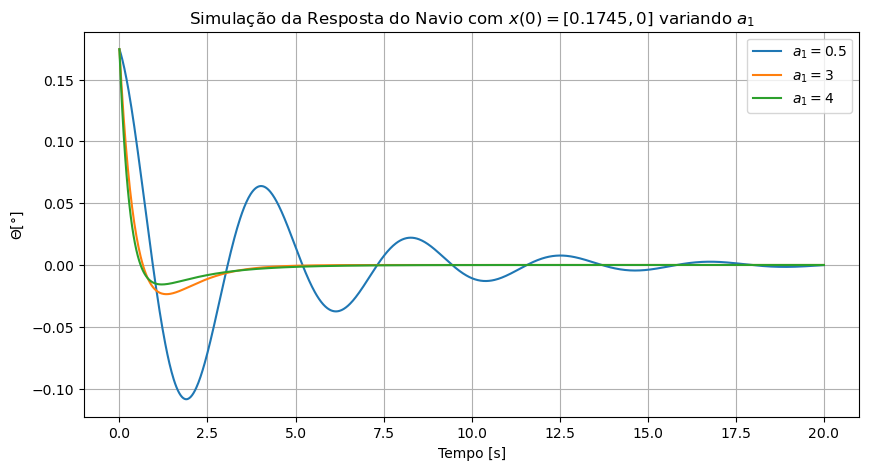

In [138]:
fig, ax = plt.subplots(1,1, figsize=(10,5), dpi = 100)

ax.plot(resp1.time, resp1.states[0], label = '$a_1 = 0.5$')
ax.plot(resp2.time, resp2.states[0], label = '$a_1 = 3$')
ax.plot(resp3.time, resp3.states[0], label = '$a_1 = 4$')

ax.legend()
ax.set(title = 'Simulação da Resposta do Navio com $x(0) = [0.1745, 0]$ variando $a_1$', xlabel = 'Tempo [s]', ylabel = '$\Theta [°]$')
ax.grid()

plt.show()

fig.savefig('ex1.jpg')

## Exercício 2 

Faça um gráco contendo 3 curvas, sendo as duas primeiras, considerando a1 = 0, ω igual a 1,3 e 1,5 rad/s e torque de distúrbio tD = sin(ωt), a terceira curva considerando a1 = 0, 5 Ns/m, ω = 1, 5 rad/s e tD = sin(ωt). Todas as curvas com tempo de simulação de 100 s.

In [129]:
T = np.linspace(0, 100, 1000)

# a1 = 0, omg = 1.3, TD = sin(omg t)

den = [1, 0, 2.25]
sis1 = ct.tf(num, den)
resp1 = ct.forced_response(sis1, X0 = [0, 0], T = T, U = np.sin(1.3*T))

# a1 = 0, omg = 1.5, TD = sin(omg t)

den = [1, 0, 2.25]
sis2 = ct.tf(num, den)
resp2 = ct.forced_response(sis2, X0 = [0, 0], T = T, U = np.sin(1.5*T))

# a1 = 0.5, omg 1.5, TD = sin(omg t)

den = [1, 0.5, 2.25]
sis3 = ct.tf(num, den)
resp3 = ct.forced_response(sis3, X0 = [0, 0], T = T, U = np.sin(1.5*T))

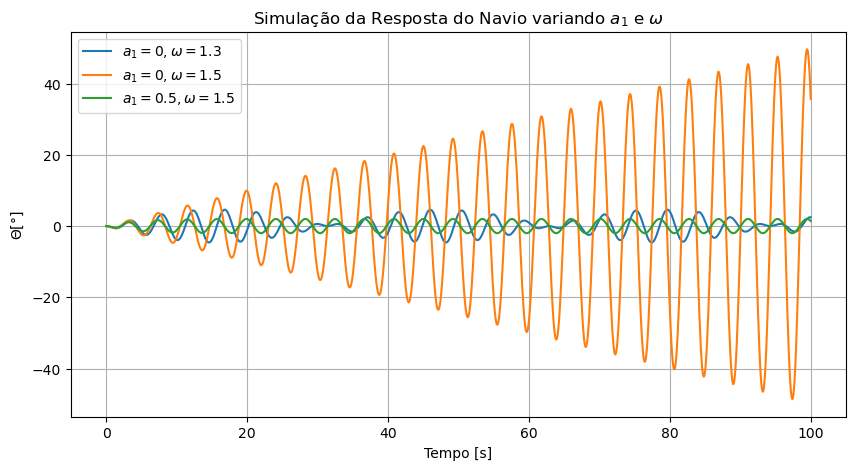

In [131]:
fig, ax = plt.subplots(1,1, figsize=(10,5), dpi = 100)

ax.plot(resp1.time, resp1.states[0], label = '$a_1 = 0, \omega = 1.3$')
ax.plot(resp2.time, resp2.states[0], label = '$a_1 = 0, \omega = 1.5$')
ax.plot(resp3.time, resp3.states[0], label = '$a_1 = 0.5, \omega = 1.5$')

ax.legend()
ax.set(title = 'Simulação da Resposta do Navio variando $a_1$ e $\omega$', xlabel = 'Tempo [s]', ylabel = '$\Theta [°]$')
ax.grid()

plt.show()

## Exercício 3

Faça um gráfico contendo 2 curvas, uma considerando o torque de distúrbio tD = sin(ωt), ω = 1, 5 rad/s e a1 = 0, 5 Ns/m com condições iniciais nula e outra nas mesma condições com condições iniciais θ0 = 0, 1745, e θ˙0 = 0, com tempo de simulação de 10 s;

In [133]:
T = np.linspace(0, 10, 1000)

# X0 = [0, 0]

den = [1, 0.5, 2.25]
sis1 = ct.tf(num, den)
resp1 = ct.forced_response(sis1, X0 = [0, 0], T = T, U = np.sin(1.5*T))

# X0 = [0.1745, 0]

den = [1, 0.5, 2.25]
sis2 = ct.tf(num, den)
resp2 = ct.forced_response(sis2, X0 = [0.1745, 0], T = T, U = np.sin(1.5*T))

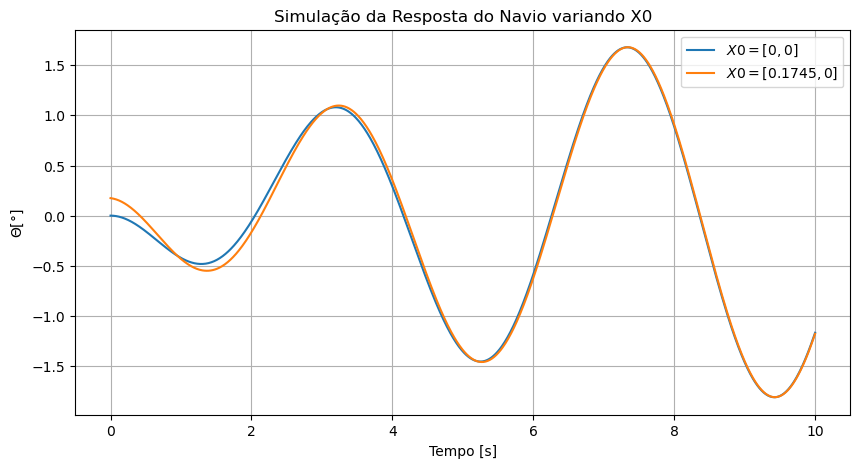

In [134]:
fig, ax = plt.subplots(1,1, figsize=(10,5), dpi = 100)

ax.plot(resp1.time, resp1.states[0], label = '$X0 = [0,0]$')
ax.plot(resp2.time, resp2.states[0], label = '$X0 = [0.1745, 0]$')

ax.legend()
ax.set(title = 'Simulação da Resposta do Navio variando X0', xlabel = 'Tempo [s]', ylabel = '$\Theta [°]$')
ax.grid()

plt.show()